# A Sentimental Analysis on Cryptocurrencies using Natural Language Processing

---

### Part Zero - Perform the inital imports needed in this notebook

---

In [161]:
# This can be used to create .env files to house API Keys
# %env NAME_VAR Value_Var

In [162]:
# Import a library to ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [163]:
# Call in the initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline

In [164]:
# Check our current working directory
os.getcwd()

'/Users/cg/Documents/FinTech_Bootcamp/[Unit_12]Natural_Language_Processing/[Homework]Crypto_Sentiment'

---

### Part One - Sentiment Analysis

---

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

In [165]:
load_dotenv()

True

In [166]:
# Read your api key environment variable
api_key = os.getenv('News_API')

In [167]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)
print(newsapi)

In [168]:
# Here I will fetch all of the Articles about Bitcoin
btc_news = newsapi.get_everything(
    q = "Bitcoin",
    language = 'en'
) 

# Show the total number of news articles
print(f"The total number of bitcoin articles that will be examined is : {btc_news['totalResults']}")

The total number of bitcoin articles that will be examined is : 8257


In [169]:
# Here I will fetch all of the articles about Ethereum
eth_news = newsapi.get_everything(
    q = "Ethereum",
    language = 'en'
) 

# Show the total number of news articles
print(f"The total number of bitcoin articles that will be examined is : {eth_news['totalResults']}")

The total number of bitcoin articles that will be examined is : 3870


In [170]:
# Here I will create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
        })
        
    except AttributeError:
        pass
    
# Create a dataframe to store this information
btc_df = pd.DataFrame(btc_sentiments)

# Display the data in the dataframe
btc_df.head(10)

,Compound,Positive,Negative,Neutral,Text
0,0.1531,0.057,0.041,0.902,Miners voluntarily powered down as energy dema...
1,0.5994,0.130,0.034,0.835,You gotta hand it to some people for being imp...
2,0.0516,0.088,0.057,0.855,People in Russia will soon no longer be allowe...
3,-0.7579,0.000,0.169,0.831,"Three Arrows Capital, one of the crypto indust..."
4,0.2023,0.053,0.000,0.947,Elon Musk-owned electric vehicle making compan...
5,-0.2732,0.059,0.088,0.853,Grayscale Investments has announced its intent...
6,0.4404,0.109,0.000,0.891,What a difference a year makes. After making b...
7,0.4404,0.083,0.000,0.917,Tesla released its 2022 Q2 earnings Wednesday ...
8,0.3818,0.208,0.082,0.710,June 27 (Reuters) - Bitcoin miners have been f...
9,-0.4404,0.000,0.083,0.917,July 19 (Reuters) - If you're waiting for a bi...


In [171]:
# Here I will create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            })
        
    except AttributeError:
        pass
    
# Create a dataframe to store this information
eth_df = pd.DataFrame(eth_sentiments)

# Display the data in the dataframe
eth_df.head(10)

,Compound,Positive,Negative,Neutral,Text
0,0.2263,0.077,0.000,0.923,Axie Infinity was the prime example of crypto ...
1,-0.1531,0.000,0.045,0.955,"Less than two weeks into its soft launch, Game..."
2,0.2023,0.048,0.000,0.952,"The Ethereum Merge is significant, and not jus..."
3,0.2500,0.065,0.000,0.935,Ethereum and Bitcoin have nearly become househ...
4,0.0000,0.000,0.000,1.000,"Whether you own cryptocurrency or not, the Eth..."
5,0.4404,0.091,0.000,0.909,Ethereum will improve upon its scalability aft...
6,0.0000,0.000,0.000,1.000,"It's a way off the $4,800 all-time-high, but t..."
7,0.4404,0.091,0.000,0.909,"Over the last month, ether has significantly o..."
8,0.0000,0.000,0.000,1.000,"DeFi has been called the ""wild west"" of the cr..."
9,-0.7717,0.000,0.183,0.817,Whether the first six months of 2022 have felt...


In [172]:
# Call a function to describe the Bitcoin Sentiment
print('Here I can display descriptive statistics about the BTC sentiment:') 
...
print("")
...
print(btc_df.describe())
...
print("")
...
print(f" The sum of all of the results for Bitcoin in the compound feild was : {btc_df['Compound'].sum()}")
print(f" The sum of all of the positive scores for Bitcoin was : {btc_df['Positive'].sum()}")

Here I can display descriptive statistics about the BTC sentiment:

         Compound    Positive    Negative    Neutral
count  100.000000  100.000000  100.000000  100.00000
mean     0.020498    0.061810    0.054560    0.88360
std      0.441949    0.065289    0.067278    0.08115
min     -0.862500    0.000000    0.000000    0.64100
25%     -0.296000    0.000000    0.000000    0.83100
50%      0.000000    0.059500    0.000000    0.89050
75%      0.361200    0.093750    0.092250    0.93725
max      0.888500    0.271000    0.249000    1.00000

 The sum of all of the results for Bitcoin in the compound feild was : 2.0498000000000003
 The sum of all of the positive scores for Bitcoin was : 6.181


In [173]:
# Call a function to describe the Ethereum Sentiment
print('Here I can display descriptive statistics about the ETH sentiment:') 
...
print("")
...
print(eth_df.describe())
...
print("")
...
print(f" The sum of all of the results for Ethereum in the compound feild was : {eth_df['Compound'].sum()}")
print(f" The sum of all of the positive scores for Ethereum was : {eth_df['Positive'].sum()}")

Here I can display descriptive statistics about the ETH sentiment:

         Compound    Positive    Negative     Neutral
count  100.000000  100.000000  100.000000  100.000000
mean     0.148119    0.077230    0.045380    0.877360
std      0.447397    0.071638    0.068501    0.089522
min     -0.936600    0.000000    0.000000    0.633000
25%     -0.057025    0.000000    0.000000    0.826500
50%      0.220350    0.069500    0.000000    0.896000
75%      0.458800    0.116250    0.082000    0.935250
max      0.921600    0.299000    0.354000    1.000000

 The sum of all of the results for Ethereum in the compound feild was : 14.8119
 The sum of all of the positive scores for Ethereum was : 7.723


#### Sentiment Analysis Questions:

**Which coin had the highest mean positive score?**
<br>
Ethereum had a higher mean positive score than Bitcoin, with the scores being 0.077 & 0.062 respectively.
<br>
<br>
**Which coin had the highest compound score?**
<br>
In regards to the highest maximum compound score, Ethereum had a higher score than Bitcoin, with the highest scores being 0.92 & 0.89 respectively. Additionally, when I sum all the scores in the compound column, Ethereum had a much higher score than Bitcoin. Ethereum's summed compound score was 14.81 while Bitcoin's was 2.05. 
<br>
<br>
**Which coin had the highest positive score?**
<br>
In regards to the highest maximum positive score, Ethereum had a higher score than Bitcoin, with the highest scores being 0.30 & 0.27 respectively. Additionally, when I sum all the scores in the positive column, Ethereum had a slightly higher score than Bitcoin. Ethereum's summed positive score was 7.72 while Bitcoin's was 6.18. 

---

### Part Two - Natural Language Processing

---

In this section, I will use **NLTK** and **Python** to tokenize the text for each coin.

In [174]:
# Import the needed libraries for this section 
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [175]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [176]:
# Create a list of stopwords
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))
print(stops)

{'doing', 'as', 'hers', 'herself', 'its', 'at', 'ma', 'shan', 'themselves', 'needn', "needn't", 'wasn', "wouldn't", "you'd", 'such', 'won', 'her', 'who', 'ain', 'between', "you've", "aren't", 'shouldn', 'didn', 'itself', 'will', 'this', 'he', "she's", 'to', 'y', 'if', 'because', 'few', 'under', 'his', 'we', 'ours', 'that', 'she', 'those', 'mightn', 'was', 't', 'once', "hasn't", "couldn't", "you'll", 'has', 'wouldn', 'each', 'did', 'against', 'there', 'why', "should've", "weren't", 'during', 'you', 'aren', 'off', 'whom', 'all', 'more', 'some', 'from', 'were', 'our', 'how', "mustn't", 'other', "it's", 'by', 'are', 'have', 'himself', 'only', 'my', 'any', 'd', 'where', 'they', 'for', 'after', 'out', 'll', 'is', 'very', 'the', 'through', 'down', "didn't", 'in', 'him', 'above', 'me', 'then', 'most', 'own', 'o', 'too', 'does', 'yours', 'do', 'i', 'being', 'about', 'haven', 'until', 'yourselves', 'having', 'what', 'doesn', 'ourselves', 'now', 'a', "doesn't", 'hadn', 'here', 'into', 'no', "don'

In [177]:
# Define a function to be the tokenizer
def tokenizer(text):
    sw = stops
    regex= re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', str(text))
    words= word_tokenize(re_clean)
    lem=[lemmatizer.lemmatize(word) for word in words]
    tokens= [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [178]:
# Create a new tokens column for bitcoin
btc_df["tokens"] = btc_df.Text.apply(tokenizer)

#View the new dataframe
btc_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.1531,0.057,0.041,0.902,Miners voluntarily powered down as energy dema...,"[miners, voluntarily, powered, energy, demand,..."
1,0.5994,0.130,0.034,0.835,You gotta hand it to some people for being imp...,"[got, ta, hand, people, impetuous, even, face,..."
2,0.0516,0.088,0.057,0.855,People in Russia will soon no longer be allowe...,"[people, russia, soon, longer, allowed, use, d..."
3,-0.7579,0.000,0.169,0.831,"Three Arrows Capital, one of the crypto indust...","[three, arrows, capital, one, crypto, industry..."
4,0.2023,0.053,0.000,0.947,Elon Musk-owned electric vehicle making compan...,"[elon, muskowned, electric, vehicle, making, c..."


In [179]:
# Create a new tokens column for Ethereum
eth_df["tokens"] = eth_df.Text.apply(tokenizer)

#View the new dataframe
eth_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.2263,0.077,0.000,0.923,Axie Infinity was the prime example of crypto ...,"[axie, infinity, wa, prime, example, crypto, g..."
1,-0.1531,0.000,0.045,0.955,"Less than two weeks into its soft launch, Game...","[less, two, week, soft, launch, gamestops, nft..."
2,0.2023,0.048,0.000,0.952,"The Ethereum Merge is significant, and not jus...","[ethereum, merge, significant, people, crypto,..."
3,0.2500,0.065,0.000,0.935,Ethereum and Bitcoin have nearly become househ...,"[ethereum, bitcoin, nearly, become, household,..."
4,0.0000,0.000,0.000,1.000,"Whether you own cryptocurrency or not, the Eth...","[whether, cryptocurrency, ethereum, merge, big..."


---

### Part Three - NGrams and Frequency Analysis

---

In this section I will look at the ngrams and word frequency for each coin. 

In [180]:
# Import the libraries needed for this part
from collections import Counter
from nltk import ngrams

In [181]:
# Generate the Bitcoin N-grams where N=2
N=2
btc_ngrams = Counter(ngrams(tokenizer(btc_df.Text.str.cat()), N))
print(dict(btc_ngrams))

{('miners', 'voluntarily'): 1, ('voluntarily', 'powered'): 1, ('powered', 'energy'): 1, ('energy', 'demand'): 1, ('demand', 'price'): 1, ('price', 'spiked'): 1, ('spiked', 'aerial'): 1, ('aerial', 'view'): 1, ('view', 'whinstone'): 1, ('whinstone', 'us'): 1, ('us', 'bitcoin'): 1, ('bitcoin', 'mining'): 2, ('mining', 'facility'): 1, ('facility', 'rockdale'): 1, ('rockdale', 'texas'): 1, ('texas', 'october'): 1, ('october', 'th'): 1, ('th', 'long'): 1, ('long', 'shed'): 1, ('shed', 'north'): 1, ('north', 'ameri'): 1, ('ameri', 'charsyou'): 1, ('charsyou', 'got'): 1, ('got', 'ta'): 1, ('ta', 'hand'): 1, ('hand', 'people'): 1, ('people', 'impetuous'): 1, ('impetuous', 'even'): 1, ('even', 'face'): 1, ('face', 'extraordinary'): 1, ('extraordinary', 'odds'): 1, ('odds', 'imagine'): 1, ('imagine', 'looking'): 1, ('looking', 'single'): 1, ('single', 'hard'): 1, ('hard', 'drive'): 4, ('drive', 'amidst'): 1, ('amidst', 'literal'): 1, ('literal', 'heap'): 1, ('heap', 'trash'): 1, ('trash', 'well'

In [182]:
# Generate the Ethereum N-grams where N=2
N=2
eth_ngrams = Counter(ngrams(tokenizer(eth_df.Text.str.cat()), N))
print(dict(eth_ngrams))

{('axie', 'infinity'): 2, ('infinity', 'wa'): 1, ('wa', 'prime'): 1, ('prime', 'example'): 1, ('example', 'crypto'): 1, ('crypto', 'gaming'): 1, ('gaming', 'last'): 1, ('last', 'year'): 4, ('year', 'playtoearn'): 1, ('playtoearn', 'formula'): 1, ('formula', 'helped'): 1, ('helped', 'reach'): 1, ('reach', 'million'): 1, ('million', 'daily'): 1, ('daily', 'active'): 1, ('active', 'user'): 1, ('user', 'last'): 1, ('last', 'november'): 1, ('november', 'came'): 1, ('came', 'crashing'): 1, ('crashing', 'charsless'): 1, ('charsless', 'two'): 1, ('two', 'week'): 1, ('week', 'soft'): 1, ('soft', 'launch'): 1, ('launch', 'gamestops'): 1, ('gamestops', 'nft'): 1, ('nft', 'marketplace'): 8, ('marketplace', 'already'): 1, ('already', 'courting'): 1, ('courting', 'controversy'): 1, ('controversy', 'among'): 1, ('among', 'nfts'): 1, ('nfts', 'listed'): 1, ('listed', 'platform'): 1, ('platform', 'artwork'): 1, ('artwork', 'called'): 1, ('called', 'falling'): 3, ('falling', 'man'): 3, ('man', 'wa'): 1,

In [183]:
# This Function will generate the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [184]:
# Get the top 10 words for Bitcoin
btc_top10 = token_count(tokenizer(btc_df.Text.str.cat()), 10)

# Display the top 10 words
btc_top10

[('bitcoin', 41),
 ('ha', 32),
 ('crypto', 29),
 ('cryptocurrency', 24),
 ('reuters', 24),
 ('said', 14),
 ('digital', 13),
 ('wa', 13),
 ('year', 11),
 ('july', 11)]

In [185]:
# Get the top 10 words for Ethereum
eth_top10 = token_count(tokenizer(eth_df.Text.str.cat()), 10)

# Display the top 10 words
eth_top10

[('crypto', 32),
 ('ha', 30),
 ('market', 20),
 ('cryptocurrency', 18),
 ('ethereum', 17),
 ('nft', 16),
 ('investor', 16),
 ('year', 15),
 ('charsthe', 14),
 ('charswhat', 14)]

---

### Part Four - Word Clouds

---

In this section, I will generate word clouds for each coin to summarize the news for each coin.

In [188]:
# # Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install wordcloud

In [189]:
# Import the libraries needed for this part
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

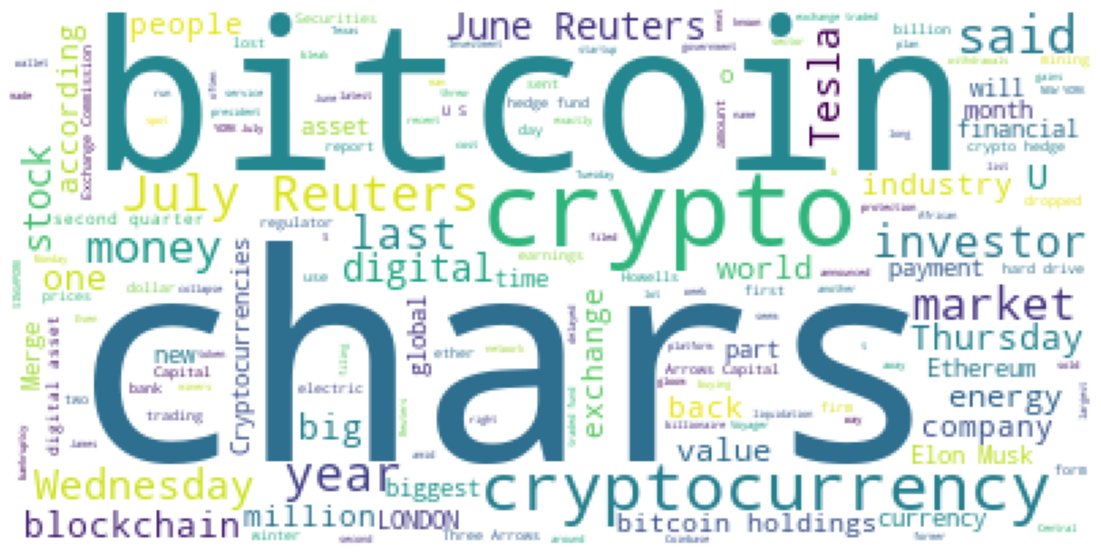

In [190]:
# Generate a word cloud for Bitcoin
btc_cloud = WordCloud(background_color='white').generate(btc_df.Text.str.cat())
btc_cloud
plt.axis("off")
plt.imshow(btc_cloud)

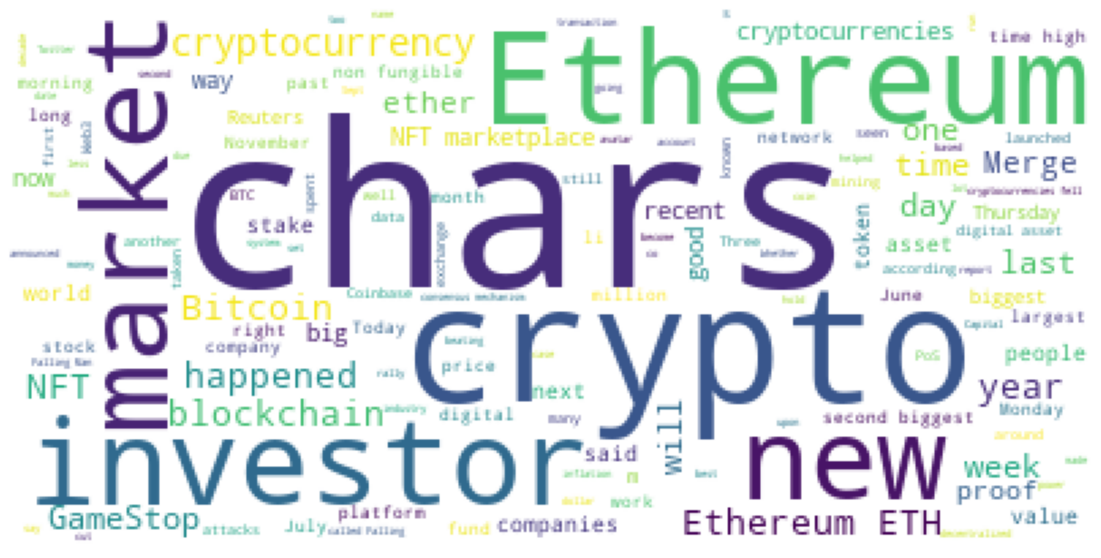

In [191]:
# Generate a word cloud for Ethereum
eth_cloud = WordCloud(background_color='white').generate(eth_df.Text.str.cat())
eth_cloud
plt.axis("off")
plt.imshow(eth_cloud)

---

### Part Five - Named Entity Recognition

---

In this section, I will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [192]:
# Import the required libraries
import spacy
from spacy import displacy

In [193]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

#### Bitcoin NER

In [194]:
# Concatenate all of the Bitcoin text together
btc_concat = btc_df.Text.str.cat()

In [195]:
# Run the NER processor on all of the text for Bitcoin
btc_doc = nlp(btc_concat)

# Add a title to the document
btc_doc.user_data["Title"] = "Bitcoin NER"

In [196]:
# Render the visualization
displacy.render(btc_doc, style = 'ent')

In [197]:
# List all Entities for Bitcoin
for i in btc_doc.ents:
    print(i.text, i.label_)

the Whinstone US Bitcoin ORG
Rockdale GPE
Texas GPE
October 9th, 2021 DATE
North Ameri GPE
UK GPE
mans NORP
Russia GPE
Russian NORP
Vladimir Putin PERSON
Arrows Capital ORG
one CARDINAL
Tuesday DATE
Musk PERSON
Tesla ORG
Bitcoin NORP
Q2 CARDINAL
Investments ORG
the Securities and Exchange Commission ORG
US GPE
ETF ORG
Just an hour TIME
SEC ORG
2021 DATE
Tesla ORG
$936 million MONEY
the second quarter of 2022 DATE
Bitcoin NORP
75 CARDINAL
2022 DATE
Wednesday DATE
$2.3 billion MONEY
second-quarter DATE
a record $3.3 billion MONEY
first ORDINAL
27 CARDINAL
Reuters ORG
chars]July 19 DATE
Reuters ORG
months DATE
chars]July 12 DATE
Reuters ORG
winter DATE
two CARDINAL
El Salvador GPE
Nayib Bukele PERSON
Bitcoin ORG
more than 50 percent PERCENT
this year DATE
chars]NEW YORK GPE
July 20 DATE
Reuters ORG
Wednesday DATE
Tesla Inc ORG
TSLA.O ORG
about 75% PERCENT
fiat ORG
29 CARDINAL
Reuters ORG
The U.S. Securities and Exchange Commission ORG
Wednesday DATE
Grayscale ORG
30 CARDINAL
Reuters ORG
6

#### Ethereum NER

In [198]:
# Concatenate all of the Ethereum text together
eth_concat = eth_df.Text.str.cat()
# eth_concat

In [199]:
# Run the NER processor on all of the text for Ethereum
eth_doc = nlp(eth_concat)

# Add a title to the document
eth_doc.user_data["Title"] = "Ethereum NER"

In [200]:
# Render the visualization
displacy.render(eth_doc, style = 'ent')

In [201]:
# List all Entities for Ethereum
for i in eth_doc.ents:
    print(i.text, i.label_)

last year DATE
up to 2.7 million MONEY
daily DATE
last November DATE
two weeks DATE
GameStops ORG
Falling Man PERSON
chars]The Ethereum Merge WORK_OF_ART
2014 DATE
Merge PERSON
second ORDINAL
the Ethereum Merge LAW
2014 DATE
Merge PERSON
second ORDINAL
Vitalik Buterin PERSON
Thursday DATE
the Ethereum Community Conference ORG
Paris GPE
4,800 MONEY
April DATE
Ethereum Merge ORG
the last month DATE
Ethereum 2.0 ORG
second ORDINAL
chars]DeFi GPE
the "wild west PRODUCT
the first six months of 2022 DATE
the first half of this DATE
Arrows Capital ORG
one CARDINAL
Tuesday DATE
28 CARDINAL
Reuters ORG
Ethereum ORG
Blockchain.com ORG
Kraken ORG
Coinbase PERSON
hundreds CARDINAL
chars]GameStop ORG
NFT ORG
Monday DATE
Ethereum ORG
Scaramucci PRODUCT
SkyBridge Capital ORG
one CARDINAL
Bloomberg GPE
Legion Strategies ORG
14 CARDINAL
Reuters ORG
NFT ORG
OpenSea ORG
Thursday DATE
about 20% PERCENT
30 CARDINAL
Reuters ORG
6.1% PERCENT
18,866.77 MONEY
GMT WORK_OF_ART
Thursday DATE
1,226.41 MONEY
60.9% 

---